In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


Let's go ahead and make the y target array

In [31]:
y=df['Yearly Amount Spent']

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


`df.info()` shows the dtypes, features, and number of observations
`df.describe()` shows statistical information.

In [17]:
df.select_dtypes(include='number').corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

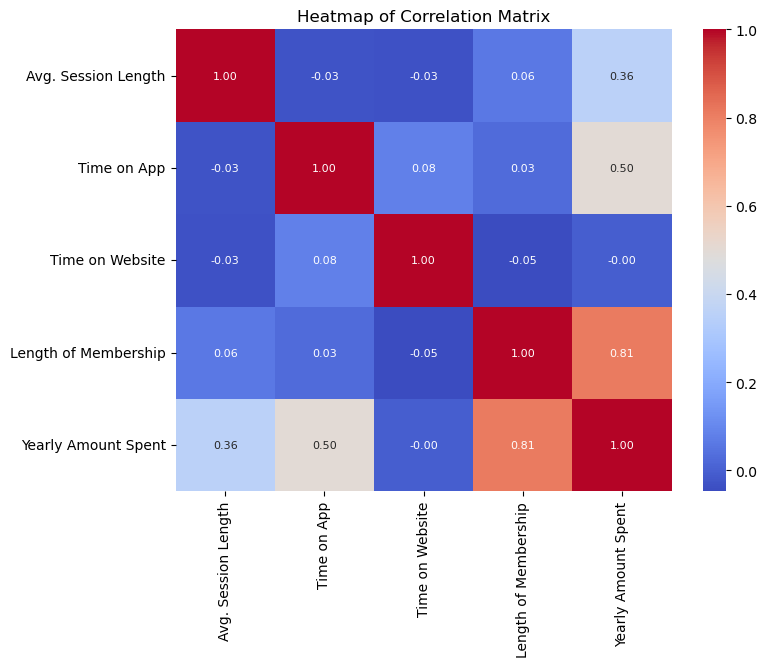

In [25]:
plt.figure(figsize=((8,6)))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,annot_kws={'size':8},fmt='.2f',cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')

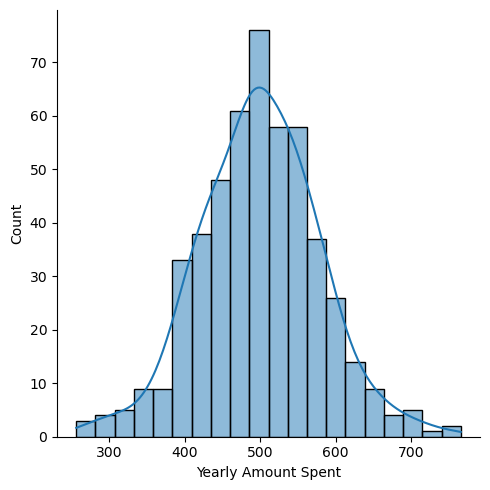

In [29]:
sns.displot(df['Yearly Amount Spent'],kde=True)

So after seeing some correlation between Time on App and Amount Spent, let's analyze it further

In [124]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

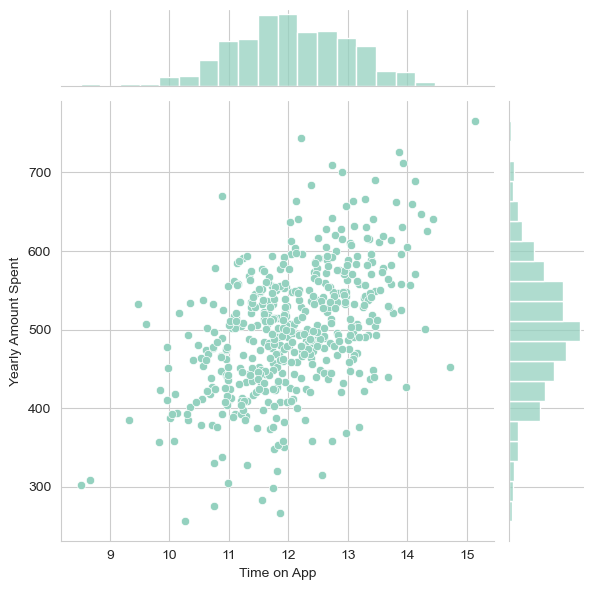

In [125]:
sns.jointplot(x=df['Time on App'],y=y)

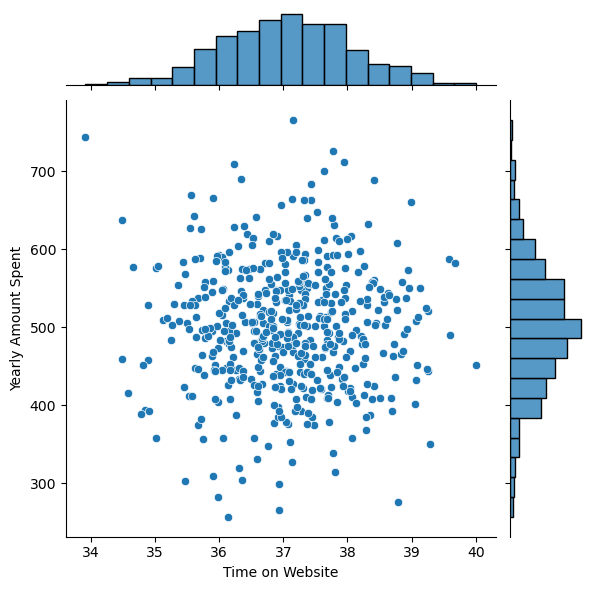

In [41]:
sns.jointplot(x=df['Time on Website'],y=y)

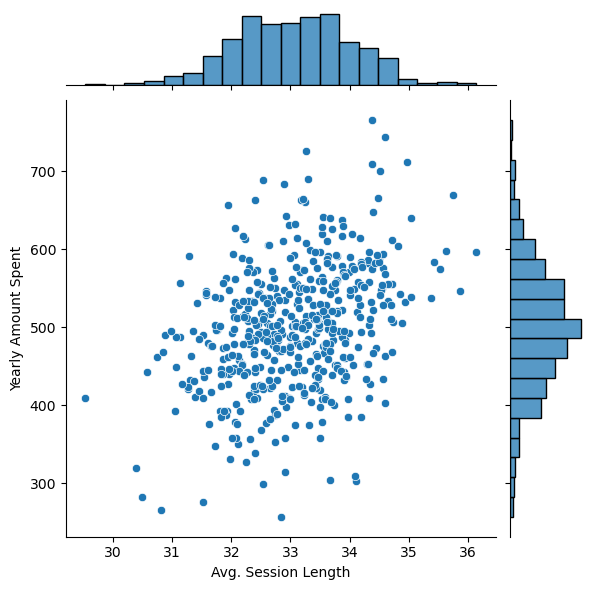

In [43]:
sns.jointplot(x=df['Avg. Session Length'],y=y)

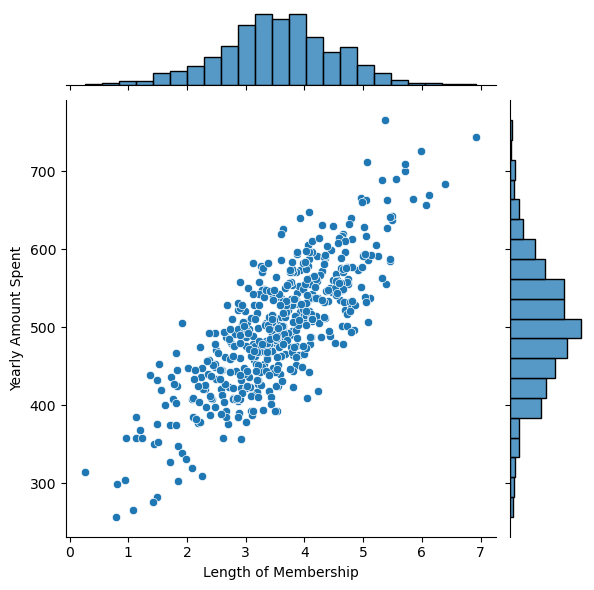

In [46]:
sns.jointplot(x=df['Length of Membership'],y=y)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

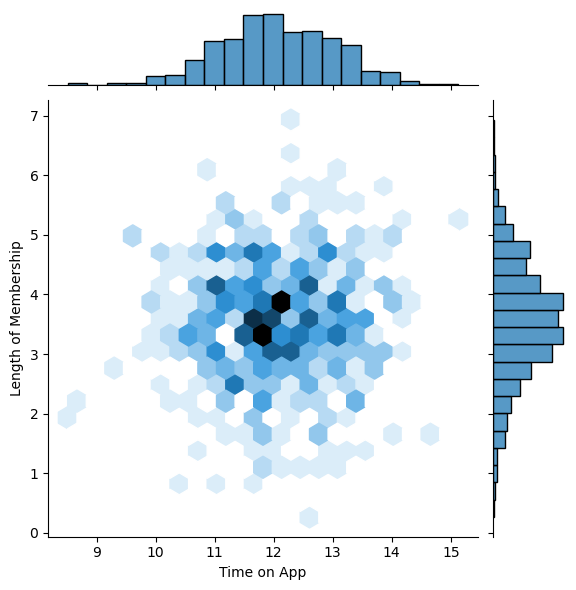

In [47]:
sns.jointplot(x=df['Time on App'],y=df['Length of Membership'],kind='hex')

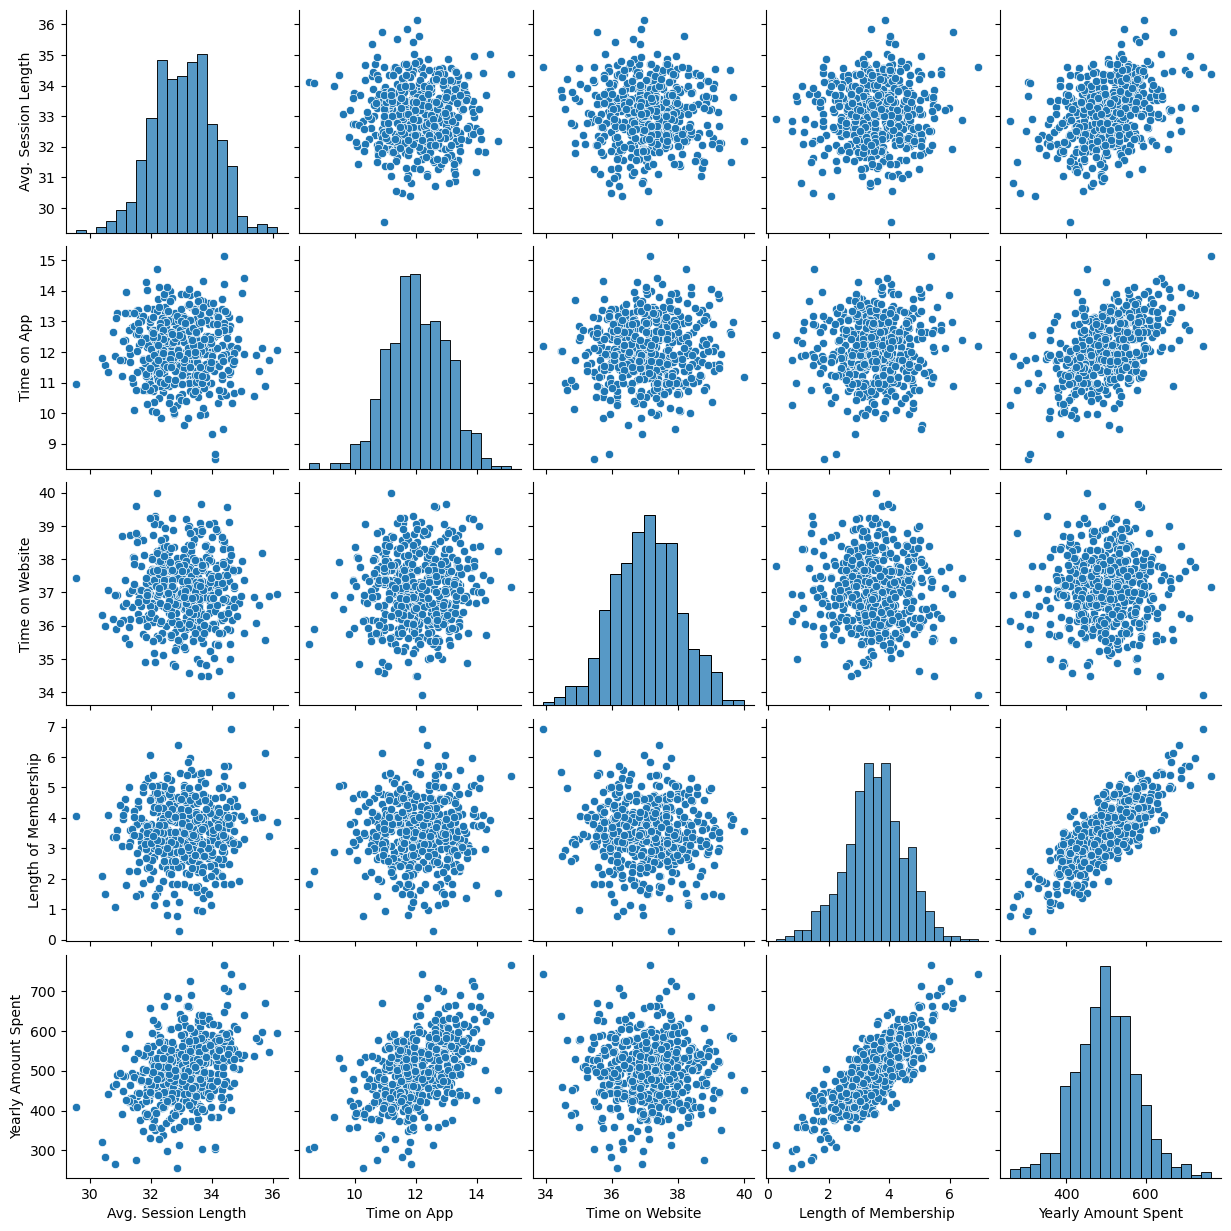

In [48]:
sns.pairplot(df)

There is a very clear linear relationship between `Length of Membership` and `Yearly Amount Spent`

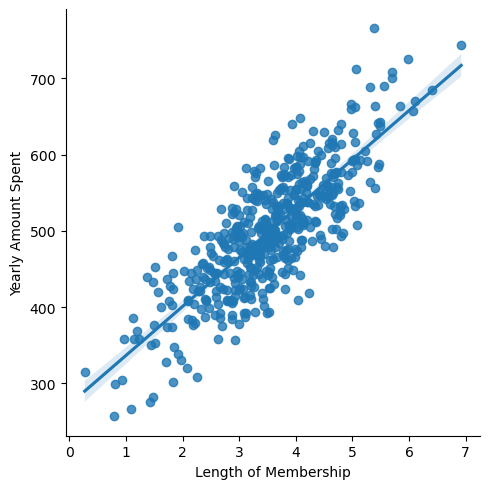

In [50]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

4. **Data Preparation:**
   - Address any missing values or outliers as deemed appropriate.
   - Encode categorical variables if present.
   - Split the data into training and testing sets to evaluate model performance.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [67]:
X=df.select_dtypes(include='number').drop(columns='Yearly Amount Spent')

In [68]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [69]:
X=df.select_dtypes(include='number').drop(columns='Yearly Amount Spent')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

5. **Model Development:**
   - Select and implement a method to fit a linear regression model to the training data.
   - Determine the model coefficients and interpret their significance.

In [71]:
from sklearn.linear_model import LinearRegression

In [74]:
lm=LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression()

In [76]:
lm.intercept_

-1047.932782250239

In [77]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [78]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [86]:
cdf=pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Yearly amount spent per unit increase'])
cdf

,Yearly amount spent per unit increase
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


6. **Model Evaluation:**
   - Assess the model's performance using appropriate evaluation metrics on both the training and testing data.
   - Analyze residuals to check for patterns that might indicate issues with the model.

In [87]:
from sklearn import metrics

In [88]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [89]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [91]:
residuals = y_test - predictions

In [170]:
test_MAE = metrics.mean_absolute_error(y_test,predictions)
test_MSE = metrics.mean_squared_error(y_test,predictions)
test_RMSE = np.sqrt(test_MSE)
r2 = metrics.r2_score(y_test,predictions)
print(f'Test MAE: ', test_MAE)
print(f'Test MSE: ', test_MSE)
print(f'Test RMSE:', test_RMSE)
print(r2)

Test MAE:  7.2281486534308295
Test MSE:  79.8130516509744
Test RMSE: 8.933815066978632
0.9890046246741234


I'm not sure how to evaluate these loss metrics.

In [100]:
train_MAE = metrics.mean_absolute_error(y_train,lm.predict(X_train))
train_MSE = metrics.mean_squared_error(y_train,lm.predict(X_train))
train_RMSE = np.sqrt(train_MSE)

print(train_MAE)
print(train_MSE)
print(train_RMSE)


8.181347287342849
106.85137432285725
10.336893843068006


Training version of the loss metrics (is this implemented correctly?)

Text(0, 0.5, 'Residuals')

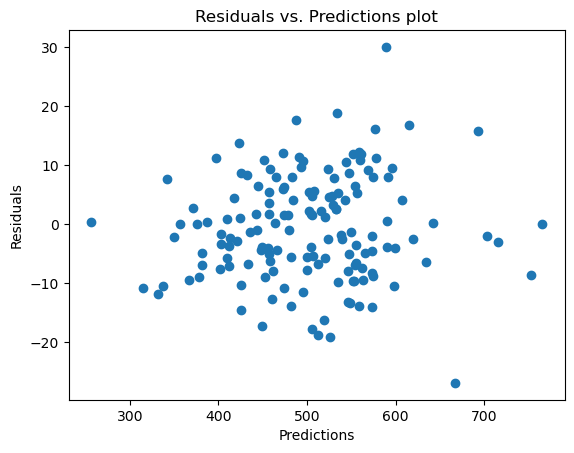

In [104]:
plt.scatter(predictions,residuals)
plt.title('Residuals vs. Predictions plot')
plt.xlabel('Predictions')
plt.ylabel('Residuals')

There doesn't seem to be patterns in the Residual Plot, indicating no problems with the model.

Text(0, 0.5, 'Y_test')

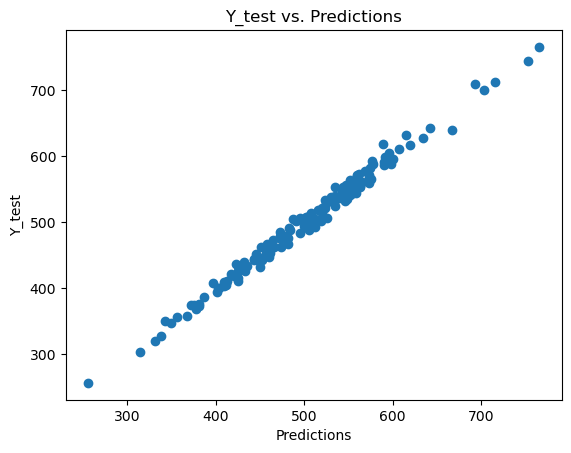

In [105]:
plt.scatter(predictions,y_test)
plt.title('Y_test vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Y_test')

There is a clear linear trend, showing that the predictions and the y test data match up pretty well.

7. **Assumption Verification:**
   - Evaluate whether the linear regression assumptions (linearity, independence, homoscedasticity, normality) hold for your model.

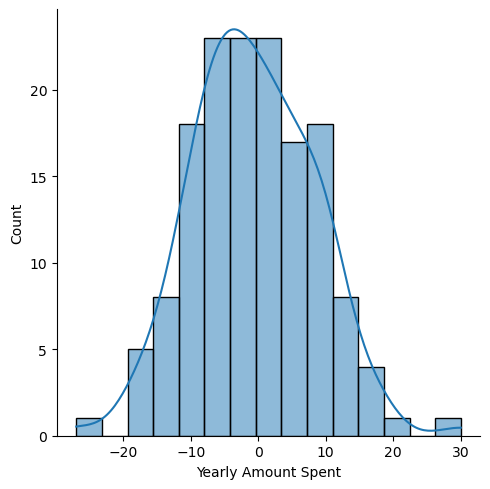

In [112]:
sns.displot(residuals,kde=True,bins=15)

The residuals show a normal distribution. The residual plot above shows no pattern, showing that linearity and homoscedasticity are fine.

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [113]:
cdf

,Yearly amount spent per unit increase
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [115]:
38.590159/0.190405

202.67408418896562

In [116]:
61.279097/38.590159

1.5879462170653404

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

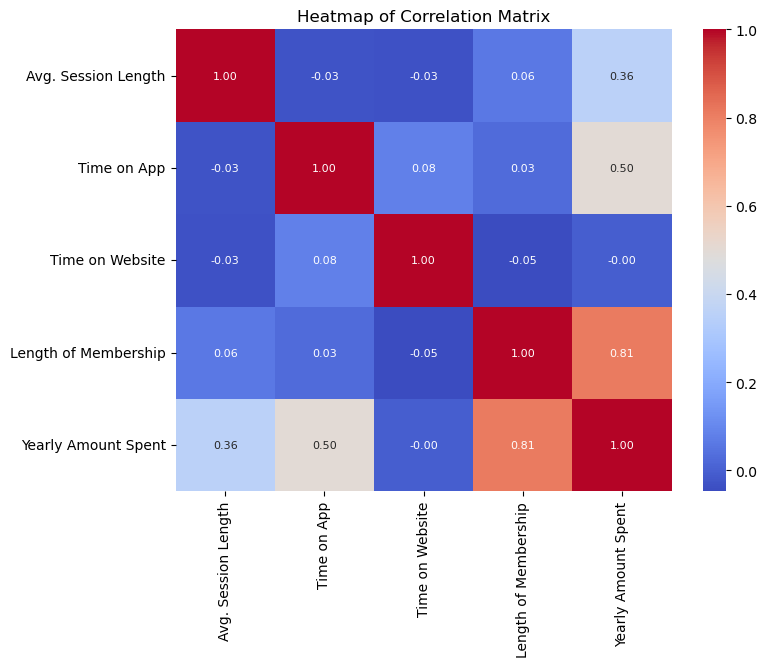

In [114]:
plt.figure(figsize=((8,6)))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,annot_kws={'size':8},fmt='.2f',cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')

## Conclusion

We should definitely focus our efforts on the mobile app. A minute spent on the app leads to more than 200x more money spent yearly over a minute spent on the website. However, the length of the membership is the most important factor in amount of money spent. But the amount of time spent on the app is not negligible compared to the length of the membership. A year of a membership is roughly equivalent to 1.6x a minute spent on the app. Therefore, if we make more people spend time on the app, it can easily surmount the difference.

Lecturer's Answer:


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

---

## Extra Study

### Variance Inflation Factor

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [127]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [173]:
X_const = add_constant(X)

In [174]:
X_const

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485


In [147]:
vif_data = pd.DataFrame()

In [148]:
vif_data["Feature"]=X_const.columns

In [149]:
vif_data

,Feature
0,const
1,Avg. Session Length
2,Time on App
3,Time on Website
4,Length of Membership


In [150]:
X_const.values

array([[ 1.        , 34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [ 1.        , 31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [ 1.        , 33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [ 1.        , 32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [ 1.        , 33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [ 1.        , 33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [153]:
vif_data["VIF"] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]

In [154]:
vif_data

,Feature,VIF
0,const,2657.483692
1,Avg. Session Length,1.005422
2,Time on App,1.008684
3,Time on Website,1.010275
4,Length of Membership,1.006949


array([[ 1.        , 34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [ 1.        , 31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [ 1.        , 33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [ 1.        , 32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [ 1.        , 33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [ 1.        , 33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [161]:
X_const.columns.size

5

### P-Value Calculation

In [171]:
import statsmodels.api as sm

In [175]:
X_const # Adds a constant to fit the Least Squares Line to

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485


In [176]:
model = sm.OLS(y,X_const).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                         13:29:32   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
model = sm.OLS(y,X_const.drop(columns=['Time on Website'])).fit()

In [183]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                 1.036e+04
Date:                 Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                         13:41:43   Log-Likelihood:                -1857.4
No. Observations:                  500   AIC:                             3723.
Df Residuals:                      496   BIC:                             3740.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1035.3396     15.983    -64.778      0.000   -1066.742   -1003.937
Avg. Session Length     25.7210      0.451     57.055      0.000      24.835      26.607
Time on App             38.7460      0.449     86.210      0.000      37.863      39.629
Length of Membership    61.5560      0.448    137.464      0.000      60.676      62.436
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.136
Skew:                          -0.027   Prob(JB):                        0.934
Kurtosis:                       3.060   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
vif_data

,Feature,VIF
0,const,2657.483692
1,Avg. Session Length,1.005422
2,Time on App,1.008684
3,Time on Website,1.010275
4,Length of Membership,1.006949


In [190]:
variance_inflation_factor

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485
